In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
import scipy.stats 

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

In [10]:
model = "mlp"
data = json.load(open(f"./diff_norm_{model}.json", "r"))
opdata = json.load(open(f"./diff_norm_op_{model}.json", "r"))

processed_data = {i: {} for i in data.keys()}
processed_opdata = {i: {} for i in opdata.keys()}

for i in data.keys():
    processed_data[i]["mean"], processed_data[i]["itv"] = mean_confidence_interval(data[i])
    processed_opdata[i]["mean"], processed_opdata[i]["itv"] = mean_confidence_interval(opdata[i])

In [11]:
import pandas as pd

df = pd.DataFrame(processed_data).fillna(0).T
opdf = pd.DataFrame(processed_opdata).fillna(0).T

Text(0.5, 1.0, 'Over-parameterized mlp')

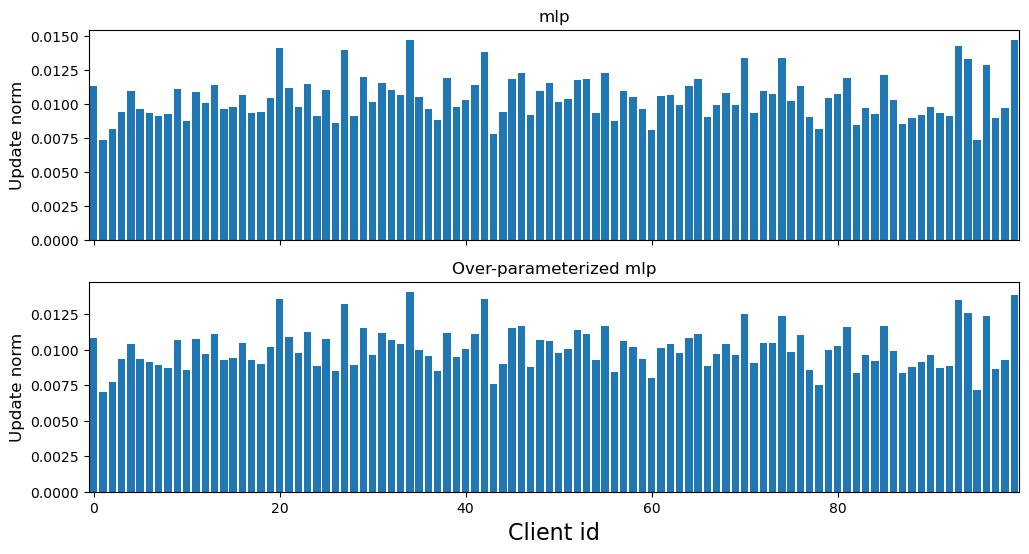

In [12]:
fig, axes = plt.subplots(2,1,figsize=(12,6), sharex=True)
axes[0].bar(x=[i for i in range(100)], height=df['mean'])
# axes[0].set_ylim(0,0.08)
axes[0].set_ylabel("Update norm", fontsize=12)
axes[0].set_title(f"{model}")

axes[1].bar(x=[i for i in range(100)], height=opdf['mean'])
# axes[1].set_ylim(0,0.08)
axes[1].set_xlim(-0.5,99.5)
axes[1].set_ylabel("Update norm", fontsize=12)
axes[1].set_xlabel("Client id", fontsize=16)
axes[1].set_title(f"Over-parameterized {model}")
